<a href="https://colab.research.google.com/github/s34836/EWD/blob/main/lab7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tasks (Lab 07)
1. Load the [`boston.csv` dataset](https://www.rdocumentation.org/packages/MASS/versions/7.3-58.3/topics/Boston) and model the relationship between the median house value (`medv`) and other variables.
    - Select a model manually. Compare 4-5 different single-variable and multi-variable models. It may be helpful to visualize the dataset's correlation matrix.
    - Perform model diagnostics.
        - In model summaries, observe the $R^2$, coefficients and their $p$-values.
        - Create residual plots.
    - Write down your conclusions.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.gridspec import GridSpec

boston_df_raw = pd.read_csv('boston.csv')
df = boston_df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


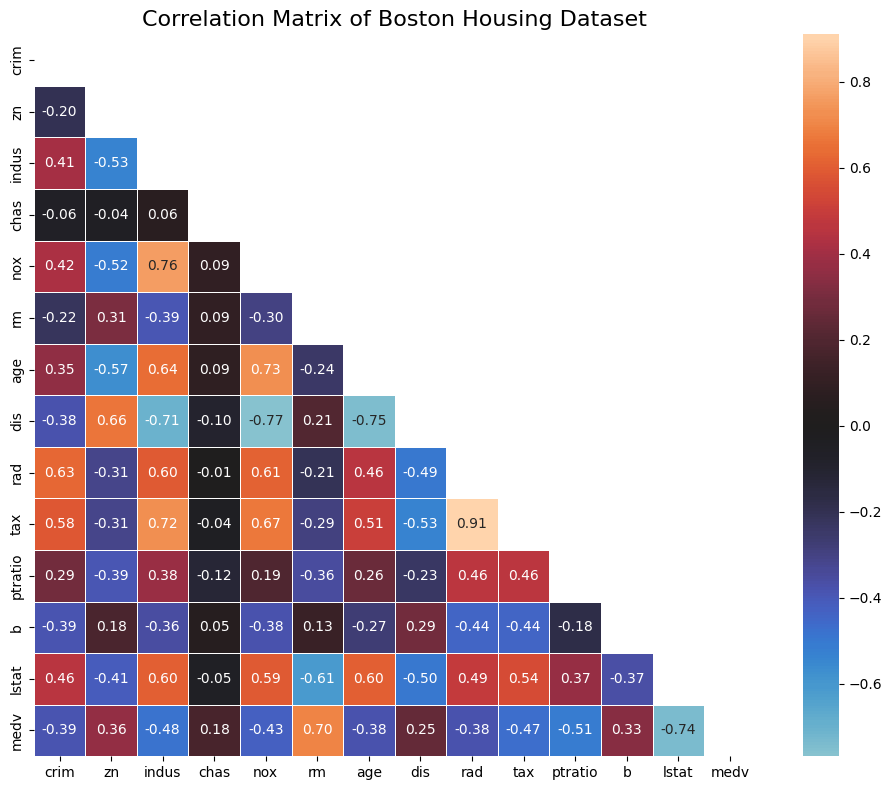

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f",
            square=True, linewidths=.5, center=0)
plt.title('Correlation Matrix of Boston Housing Dataset', fontsize=16)
plt.tight_layout()
plt.show()



FROM: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [ ]:

# Model 1: Prosta regresja liniowa z rm (średnia liczba pokoi)
# 'rm' ma najsilniejszą dodatnią korelację (0,70) z medv
# Jest model bazowy wykorzystujący najlepszy pojedynczy predyktor dodatni
# No i domy z większą liczbą pokoi są zazwyczaj większe i droższe
model1 = smf.ols(formula='medv ~ rm', data=df).fit()
print("\n----- Model 1: medv ~ rm -----")
print(model1.summary())


----- Model 1: medv ~ rm -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        12:12:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.670

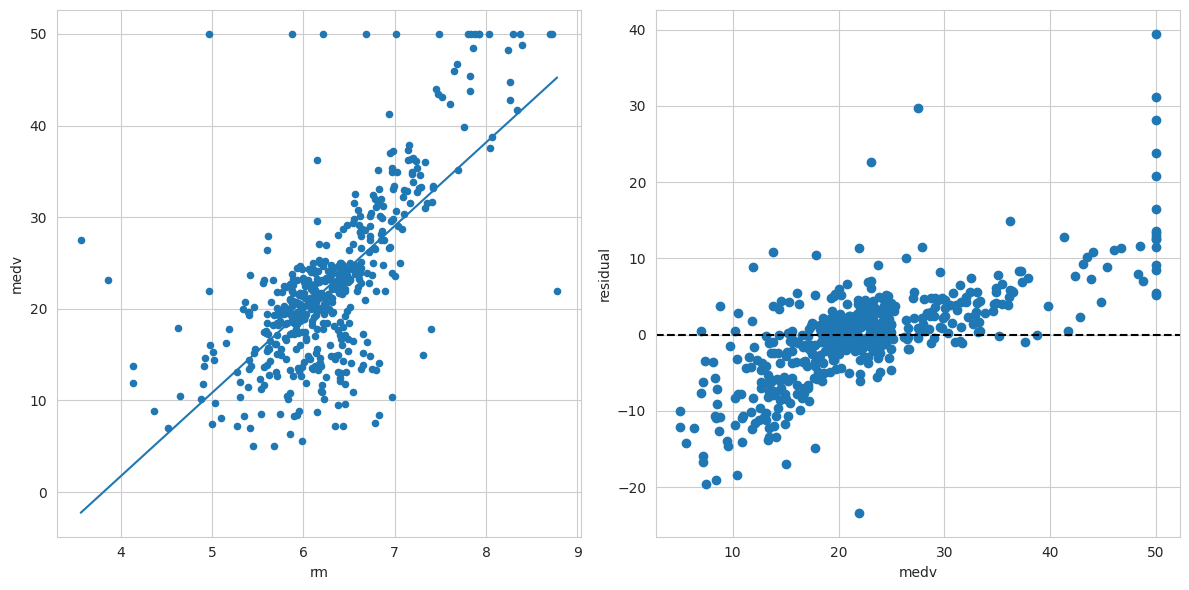

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 1
df.plot(kind='scatter', y='medv', x='rm', ax=ax1)
x_plot = np.linspace(df.rm.min(), df.rm.max(), 100)
b0, b1 = model1.params  # Using your existing model1
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model1.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

The residuals indicate a non-linear relationship (Residuals are not random).

In [ ]:
# Model 2: Prosta regresja liniowa z lstat (% populacji o niższym statusie)
# - Używamy 'lstat', ponieważ ma najsilniejszą ujemną korelację (-0,74) z medv
# - Jest to nasz model bazowy wykorzystujący najlepszy pojedynczy predyktor ujemny
# - SES okolicy silnie wpływa na wartość nieruchomości
model2 = smf.ols(formula='medv ~ lstat', data=df).fit()
print("\n----- Model 2: medv ~ lstat -----")
print(model2.summary())




----- Model 2: medv ~ lstat -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        08:04:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.

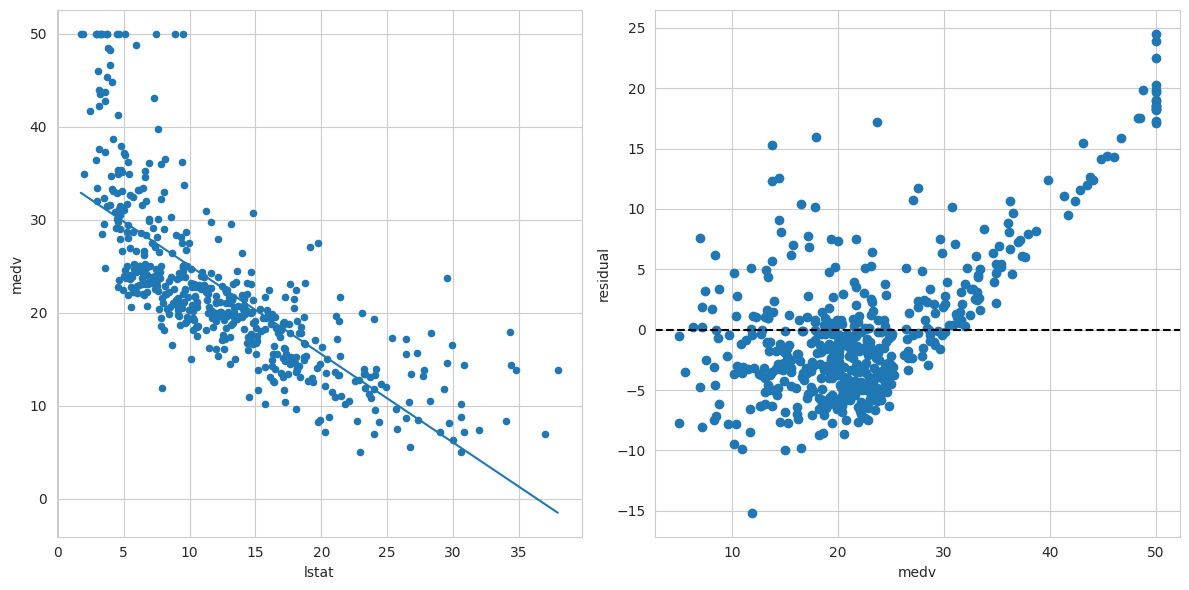

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 2
df.plot(kind='scatter', y='medv', x='lstat', ax=ax1)
x_plot = np.linspace(df.lstat.min(), df.lstat.max(), 100)
b0, b1 = model2.params
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model2.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

In [ ]:
# Model 3: Wielokrotna regresja liniowa z rm i lstat
# - Łączymy dwa najsilniejsze predyktory (jeden dodatni, jeden ujemny)
# - Te czynniki reprezentują różne aspekty: fizyczne cechy domu (rm) i
#   demografię okolicy (lstat)
# - Sprawdzamy, czy połączenie tych uzupełniających się czynników poprawia predykcję
model3 = smf.ols(formula='medv ~ rm + lstat', data=df).fit()
print("\n----- Model 3: medv ~ rm + lstat -----")
print(model3.summary())




----- Model 3: medv ~ rm + lstat -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          7.01e-112
Time:                        07:27:07   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [ ]:
# Model 4: Wielokrotna regresja liniowa z rm, lstat i ptratio
# - Dodajemy 'ptratio' (stosunek liczby uczniów do nauczycieli), który ma znaczną ujemną korelację (-0,51)
# - Jakość szkół jest często istotnym czynnikiem na rynku nieruchomości w USA
# - Sprawdzamy, czy wskaźniki edukacyjne dostarczają dodatkowej mocy predykcyjnej poza
#   charakterystyką domu i demografią okolicy

# inna sprawa że liczba nauczyclei to bardzo nie efektywny sposób na popawę edukacji :)

model4 = smf.ols(formula='medv ~ rm + lstat + ptratio', data=df).fit()
print("\n----- Model 4: medv ~ rm + lstat + ptratio -----")
print(model4.summary())




----- Model 4: medv ~ rm + lstat + ptratio -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.69e-123
Time:                        08:30:58   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [ ]:
# Model 5: Wielokrotna regresja liniowa ze wszystkimi zmiennymi mającymi korelację > 0,4 z medv
# - Kompleksowy model uwzględniający czynniki środowiskowe (nox), ekonomiczne (tax),
#   oraz obecność przemysłu (indus)
# - Sprawdzamy, czy bardziej złożony model uwzględniający różnorodne charakterystyki okolicy
#   zapewnia znaczącą poprawę
# - Zawiera zmienne, które mogą mieć interakcje lub współliniowość
model5 = smf.ols(formula='medv ~ rm + lstat + ptratio + indus + nox + tax', data=df).fit()
print("\n----- Model 5: medv ~ rm + lstat + ptratio + indus + nox + tax -----")
print(model5.summary())




----- Model 5: medv ~ rm + lstat + ptratio + indus + nox + tax -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.26e-120
Time:                        08:31:04   Log-Likelihood:                -1551.2
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     499   BIC:                             3146.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
# Tworzenie tabeli porównawczej dla wszystkich modeli
# - R-kwadrat: proporcja wyjaśnionej wariancji (wyższa jest lepsza)
# - Skorygowany R-kwadrat: R-kwadrat skorygowany o liczbę predyktorów (wyższy jest lepszy)
# - AIC/BIC: Kryteria informacyjne do wyboru modelu (niższe są lepsze)
# - Te metryki pomagają nam zrównoważyć złożoność modelu i moc wyjaśniającą

def format_pvalue(p):
    if p < 0.001:
        return "<.001"
    else:
        return f"{p:.3f}"

models_comparison = pd.DataFrame({
    'Model': ['rm', 'lstat', 'rm + lstat', 'rm + lstat + ptratio',
              'rm + lstat + ptratio + indus + nox + tax'],
    'R-kwadrat': [model1.rsquared, model2.rsquared, model3.rsquared,
                 model4.rsquared, model5.rsquared],
    'Skorygowany R-kwadrat': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj,
                             model4.rsquared_adj, model5.rsquared_adj],
    'AIC': [model1.aic, model2.aic, model3.aic, model4.aic, model5.aic],
    'BIC': [model1.bic, model2.bic, model3.bic, model4.bic, model5.bic],
    'p-value': [model1.f_pvalue, model2.f_pvalue, model3.f_pvalue, model4.f_pvalue, model5.f_pvalue]
})


# Format p-values to be more readable
models_comparison['p-value'] = models_comparison['p-value'].apply(format_pvalue)


print("\nPorównanie modeli:")
print(models_comparison)

# Po porównaniu tych modeli, wybierzemy najlepszy na podstawie:
# 1. Najwyższy skorygowany R-kwadrat (uwzględnia złożoność modelu)
# 2. Najniższe wartości AIC/BIC
# 3. Istotność statystyczna współczynników
# 4. Brak współliniowości w predyktorach


Porównanie modeli:
                                      Model  R-kwadrat  Skorygowany R-kwadrat  \
0                                        rm   0.483525               0.482501   
1                                     lstat   0.544146               0.543242   
2                                rm + lstat   0.638562               0.637124   
3                      rm + lstat + ptratio   0.678624               0.676704   
4  rm + lstat + ptratio + indus + nox + tax   0.681022               0.677186   

           AIC          BIC p-value  
0  3350.151117  3358.604191   <.001  
1  3286.974957  3295.428030   <.001  
2  3171.542314  3184.221924   <.001  
3  3114.097267  3131.003414   <.001  
4  3116.308158  3145.893914   <.001  


rm + lstat + ptratio - the best



## Tasks (Lab 08)
1. Create non-linear (for example polynomial) models and models with interaction terms for the `boston` dataset. Compare them to models created in the previous task.
2. Implement the forward selection method. You can use the Adjusted `R^2` metric or a validation set to evaluate/select models.
3. Load the `housing.csv` dataset and:
    - Remove rows containing missing values (or fill them in with the mean).
    - One-hot encode the `ocean_proximity` variable using `pd.get_dummies()`.
    - Model the dependence of `median_house_value` on `ocean_proximity`.

Create non-linear (for example polynomial) models and models with interaction terms for the boston dataset. Compare them to models created in the previous task.

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
boston_df = pd.read_csv('boston.csv')

# Create a copy to work with
df = boston_df.copy()
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



----- Model 1: medv ~ rm -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        10:39:29   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.670

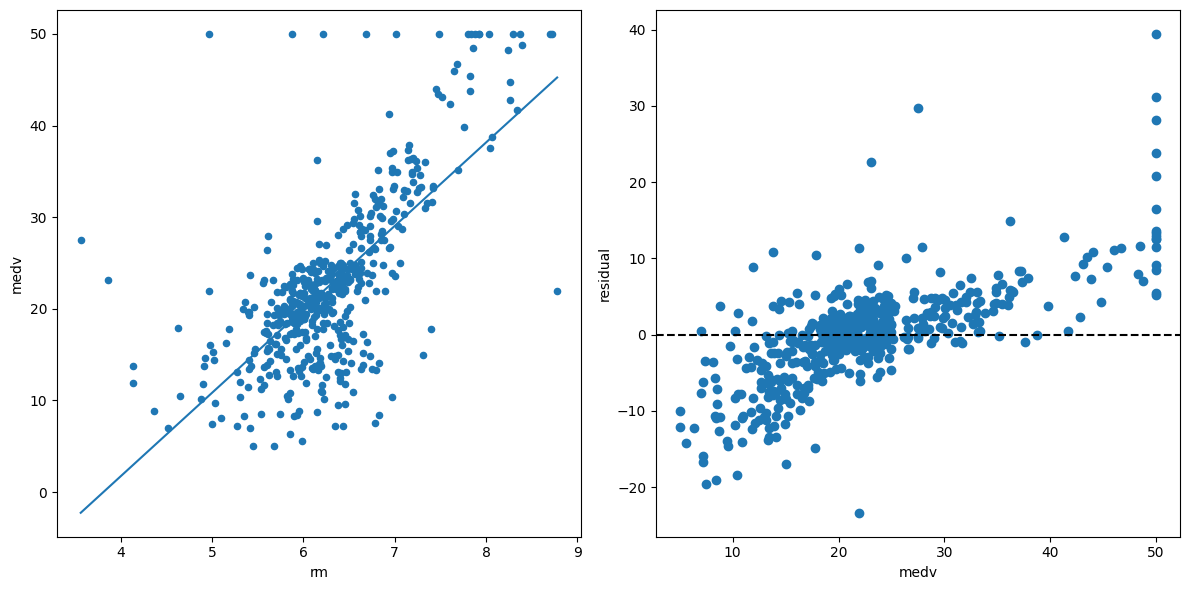

In [53]:
# Prosta regresja liniowa z rm (średnia liczba pokoi)

model1 = smf.ols(formula='medv ~ rm', data=df).fit()
print("\n----- Model 1: medv ~ rm -----")
print(model1.summary())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 1
df.plot(kind='scatter', y='medv', x='rm', ax=ax1)
x_plot = np.linspace(df.rm.min(), df.rm.max(), 100)
b0, b1 = model1.params  # Using your existing model1
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model1.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

Conclusion: lets log() - when value up residual const, const and then up.


----- Model 2: medv ~ lstat -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        10:39:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.

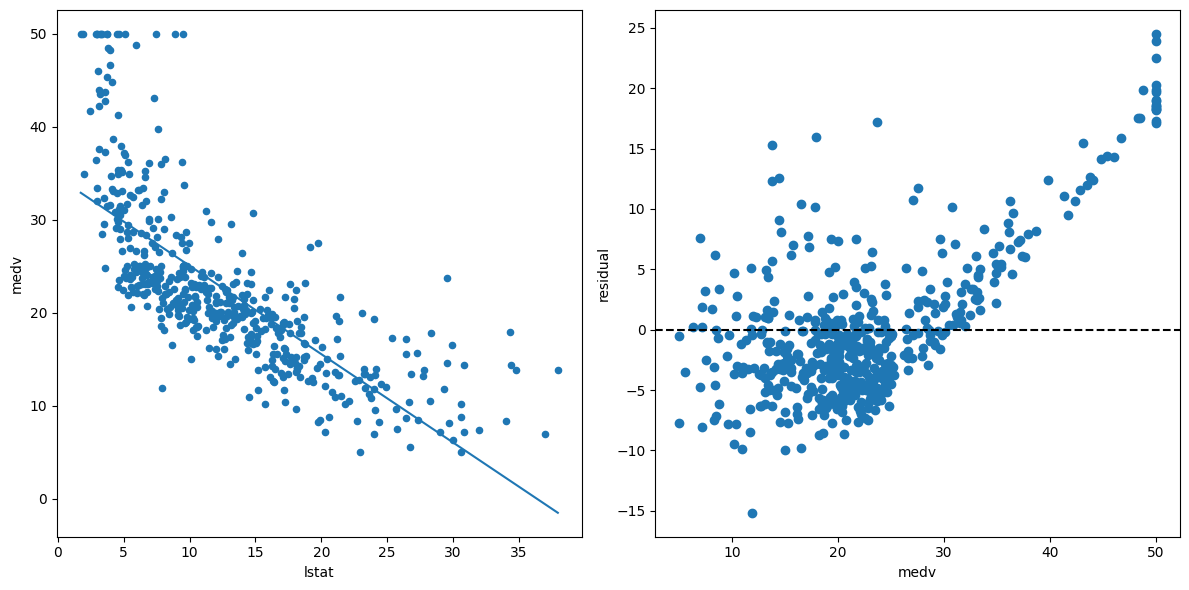

In [54]:
# Model 2: Prosta regresja liniowa z lstat (% populacji o niższym statusie)

model2 = smf.ols(formula='medv ~ lstat', data=df).fit()
print("\n----- Model 2: medv ~ lstat -----")
print(model2.summary())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 2
df.plot(kind='scatter', y='medv', x='lstat', ax=ax1)
x_plot = np.linspace(df.lstat.min(), df.lstat.max(), 100)
b0, b1 = model2.params
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model2.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

Conclusion: lets try ^2 residuals like U, left plot like x^2


----- Model 3: medv ~ ptratio -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.61e-34
Time:                        10:39:35   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6

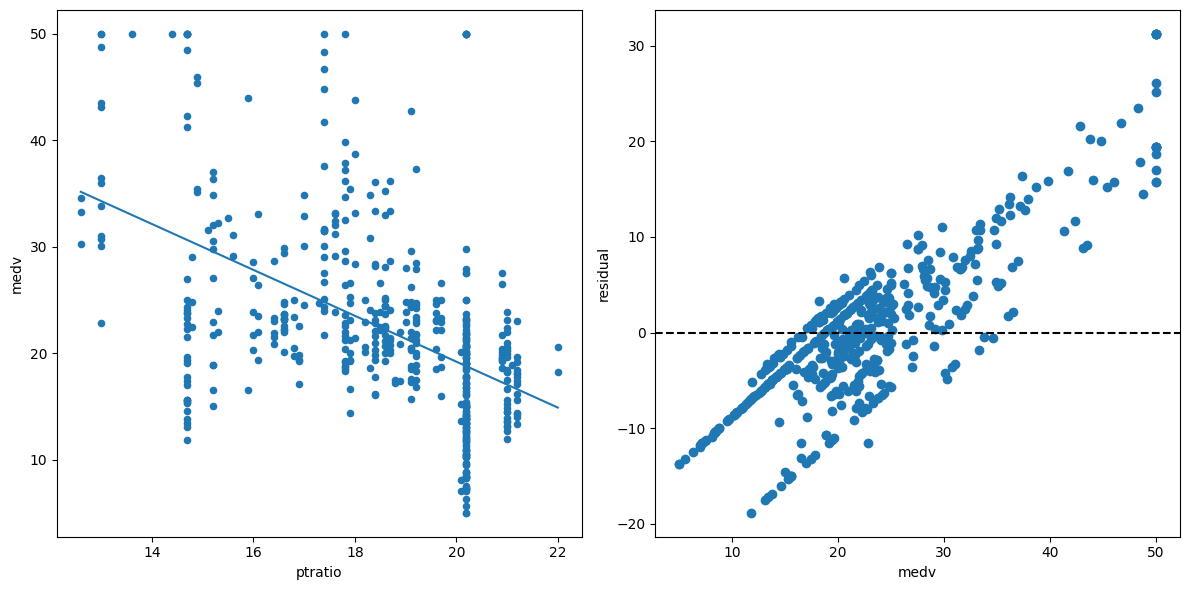

In [55]:
# Model 3: Prosta regresja liniowa z  ptratio (stosunek liczby uczniów do nauczycieli)

model3 = smf.ols(formula='medv ~ ptratio', data=df).fit()
print("\n----- Model 3: medv ~ ptratio -----")
print(model3.summary())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 3
df.plot(kind='scatter', y='medv', x='ptratio', ax=ax1)
x_plot = np.linspace(df.ptratio.min(), df.ptratio.max(), 100)
b0, b1 = model3.params
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model3.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

Conclusion: lets try log() - liniowa zależność residual
Efekty moderacyjne rm * lstat


In [56]:

# Model 4: rm + lstat + ptratio
# poprzedno the best
model4 = smf.ols(formula='medv ~ rm + lstat + ptratio', data=df).fit()
print("\n----- Model 4 (Previous best): medv ~ rm + lstat + ptratio -----")
print(model4.summary())

# Model 6: rm +rm2 + lstat +lstat2 + np.log(ptratio)
model6 = smf.ols(formula='medv ~ rm + I(rm**2) + lstat + I(lstat**2) + np.log(ptratio)', data=df).fit()
print("\n----- Model 6: rm +rm2 + lstat +lstat2 + np.log(ptratio) ----")
print(model6.summary())

# Model 7: Interaction between rm and lstat
model7 = smf.ols(formula='medv ~ rm + lstat + ptratio + rm:lstat', data=df).fit()
print("\n----- Model 7: medv ~ rm + lstat + ptratio + rm:lstat -----")
print(model7.summary())

# Model 8: Wszystko na raz
model8 = smf.ols(formula='medv ~ rm + I(rm**2) + lstat + I(lstat**2) + np.log(ptratio) + rm:lstat', data=df).fit()
print("\n----- Model 8: All in one  -----")
print(model8.summary())



----- Model 4 (Previous best): medv ~ rm + lstat + ptratio -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.69e-123
Time:                        10:39:38   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [57]:

# Create comparison table
models_comparison = pd.DataFrame({
    'Model': ['rm + lstat + ptratio',
             'rm + rm² + lstat + lstat² + log(ptratio)',
             'rm + lstat + ptratio + rm×lstat',
             'rm + rm² + lstat + lstat² + log(ptratio) + rm×lstat'],
    'R-squared': [model4.rsquared, model6.rsquared, model7.rsquared, model8.rsquared],
    'Adj. R-squared': [model4.rsquared_adj, model6.rsquared_adj, model7.rsquared_adj, model8.rsquared_adj],
    'AIC': [model4.aic, model6.aic, model7.aic, model8.aic],
    'BIC': [model4.bic, model6.bic, model7.bic, model8.bic]
})

print("\nModels Comparison:")
print(models_comparison)



Models Comparison:
                                               Model  R-squared  \
0                               rm + lstat + ptratio   0.678624   
1           rm + rm² + lstat + lstat² + log(ptratio)   0.769949   
2                    rm + lstat + ptratio + rm×lstat   0.756267   
3  rm + rm² + lstat + lstat² + log(ptratio) + rm×...   0.773861   

   Adj. R-squared          AIC          BIC  
0        0.676704  3114.097267  3131.003414  
1        0.767649  2948.935210  2974.294430  
2        0.754321  2976.168508  2997.301192  
3        0.771142  2942.258266  2971.844022  


The best: rm + rm² + lstat + lstat² + log(ptratio) [ bo R2 == 0,77 i intercept, variables p<0,05]

2. Implement the forward selection method. You can use the Adjusted `R^2` metric or a validation set to evaluate/select models.

In [74]:
all_features = [col for col in df.columns if col != 'medv']
selected_features = []
# Empty model (intercept only)
current_model = smf.ols(formula=f"medv ~ 1", data=df).fit()
best_adj_r2 = current_model.rsquared_adj
model_history.append({
    'features': [],
    'adj_r2': best_adj_r2,
    'aic': current_model.aic
})
remaining_features = [f for f in all_features if f not in selected_features]
while remaining_features:
    best_feature = None
    best_new_adj_r2 = best_adj_r2
    best_p_value = 1.0

    for feature in remaining_features:
        if selected_features:
            formula = f"medv ~ {' + '.join(selected_features)} + {feature}"
        else:
            formula = f"medv ~ {feature}"

        # Fit the model and get adjusted R²
        model = smf.ols(formula=formula, data=df).fit()
        new_adj_r2 = model.rsquared_adj

        # Get p-value for the new feature
        if selected_features:
            p_value = model.pvalues[feature]
        else:
            p_value = model.pvalues.iloc[1] if len(model.pvalues) > 1 else model.pvalues.iloc[0]

        # Check if this feature improves the model
        if (new_adj_r2 > best_new_adj_r2) and (p_value < 0.05):
            best_feature = feature
            best_new_adj_r2 = new_adj_r2
            best_p_value = p_value

    # If we found a feature that improves the model
    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_adj_r2 = best_new_adj_r2

        # Update the current model
        if len(selected_features) > 1:
            formula = f"medv ~ {' + '.join(selected_features)}"
        else:
            formula = f"medv ~ {selected_features[0]}"

        current_model = smf.ols(formula=formula, data=df).fit()

        # Add to history
        model_history.append({
            'features': selected_features.copy(),
            'adj_r2': best_adj_r2,
            'aic': current_model.aic,
            'added_feature': best_feature,
            'p_value': best_p_value
        })

        print(f"Added {best_feature} (p-value: {best_p_value:.6f}, Adj R²: {best_adj_r2:.6f})")
    else:
        # No more features to add
        break
formula = f"medv ~ {' + '.join(selected_features)}"
best_model = smf.ols(formula=formula, data=df).fit()
print(best_model.summary())
print("\nModel Building History:")
history_df = pd.DataFrame(model_history)
print(history_df)

Added lstat (p-value: 0.000000, Adj R²: 0.543242)
Added rm (p-value: 0.000000, Adj R²: 0.637124)
Added ptratio (p-value: 0.000000, Adj R²: 0.676704)
Added dis (p-value: 0.000017, Adj R²: 0.687835)
Added nox (p-value: 0.000000, Adj R²: 0.705170)
Added chas (p-value: 0.000265, Adj R²: 0.712357)
Added b (p-value: 0.000772, Adj R²: 0.718256)
Added zn (p-value: 0.004652, Adj R²: 0.722207)
Added crim (p-value: 0.044567, Adj R²: 0.723905)
Added rad (p-value: 0.001692, Adj R²: 0.728807)
Added tax (p-value: 0.000521, Adj R²: 0.734806)
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          5.54e-137
Time:                        10:52:31   Log-Likelihood:                -1

3. Load the `housing.csv` dataset and:
    - Remove rows containing missing values (or fill them in with the mean).
    - One-hot encode the `ocean_proximity` variable using `pd.get_dummies()`.
    - Model the dependence of `median_house_value` on `ocean_proximity`.

In [39]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [42]:
housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [43]:
df = housing_df.dropna()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [45]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [46]:
proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='proximity', drop_first=True)
#drop_first=True - bo jedno mniej (było 5 jest 4)
proximity_dummies.head()

,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [47]:
df = pd.concat([df, proximity_dummies], axis=1)
df.columns = [col.replace(' ', '_') for col in df.columns]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity_INLAND,proximity_ISLAND,proximity_NEAR_BAY,proximity_NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,True,False


In [48]:
model_ocean = smf.ols(formula='median_house_value ~ proximity_INLAND + proximity_ISLAND + proximity_NEAR_BAY + proximity_NEAR_OCEAN', data=df).fit()
print("\nOcean Proximity Only Model:")
print(model_ocean.summary())


Ocean Proximity Only Model:
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1595.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:36:36   Log-Likelihood:            -2.6439e+05
No. Observations:               20433   AIC:                         5.288e+05
Df Residuals:                   20428   BIC:                         5.288e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

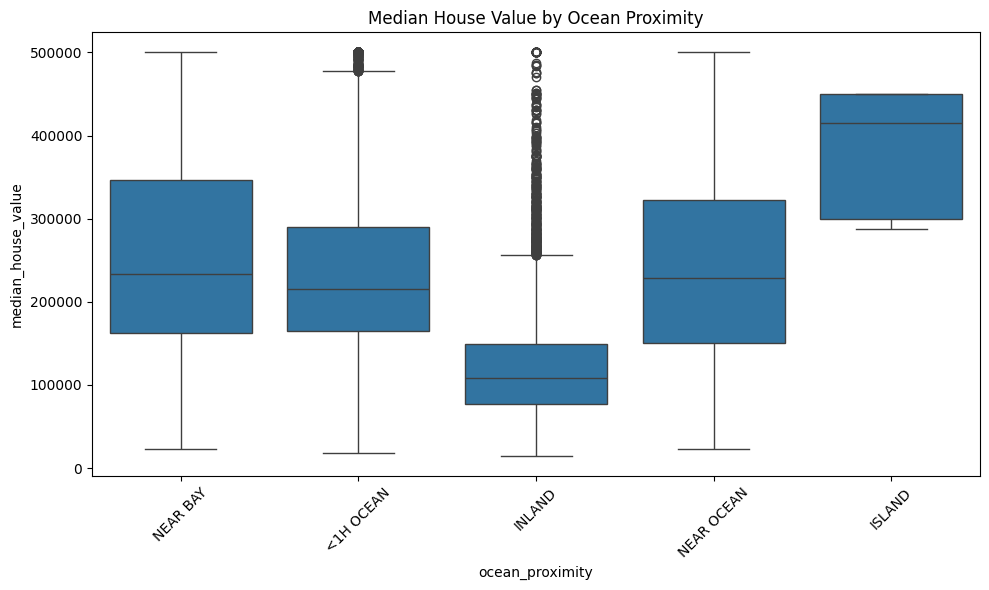

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()